In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from datetime import datetime
from datetime import date
from datetime import timedelta
import yfinance as yf

In [5]:
start_date = '1994-03-01'
final_date = '2022-09-02'

In [6]:
df_ibov = pd.DataFrame()
df_ibov['IBOV'] = yf.download('^BVSP', start = start_date, end = final_date, interval = '1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [7]:
df_ibov.head()

,IBOV
Date,
1994-03-01 00:00:00-03:00,1073.300049
1994-03-02 00:00:00-03:00,1021.500000
1994-03-03 00:00:00-03:00,1045.800049
1994-03-04 00:00:00-03:00,1114.000000
1994-03-07 00:00:00-03:00,1193.900024


In [8]:
url_bcb = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json'
ipca = pd.read_json(url_bcb)
ipca['data'] = pd.to_datetime(ipca['data'], dayfirst = True)
ipca.rename(columns={'data': 'Date'}, inplace = True)
ipca.rename(columns={'valor': 'value'}, inplace = True)
ipca.set_index('Date', inplace = True)
ipca = ipca.loc[start_date:]

In [9]:
ipca = ipca / 100
ipca.head()

,value
Date,
1994-03-01,0.4275
1994-04-01,0.4268
1994-05-01,0.4403
1994-06-01,0.4743
1994-07-01,0.0684


In [10]:
df_ipca = pd.DataFrame()
df_ipca.index = pd.date_range(start_date, final_date, freq = 'D')
df_ipca.head()

""
1994-03-01
1994-03-02
1994-03-03
1994-03-04
1994-03-05


In [11]:
list_aux = []
for i in df_ipca.index:
    if len(str(i.month)) == 1:
        list_aux.append(f'{i.year}-0{i.month}')
    else:
        list_aux.append(f'{i.year}-{i.month}')

In [12]:
df_ipca['date_aux'] = list_aux
df_ipca.head()

,date_aux
1994-03-01,1994-03
1994-03-02,1994-03
1994-03-03,1994-03
1994-03-04,1994-03
1994-03-05,1994-03


In [13]:
list_ipca = []
for i in df_ipca['date_aux']:
    for index, row in ipca.iterrows():
        if i == index.strftime('%Y-%m'):
            list_ipca.append(row['value'])

In [14]:
for i in df_ipca['date_aux']:
    month = i.split('-')[1]
    
    if month == '01' or month == '03' or month == '05' or month == '07' or month == '08' or month == '10' or month == '12':
        df_ipca['IPCA'] = list_ipca
        df_ipca['IPCA'] = ((1 + df_ipca['IPCA'])**(1/31)) - 1
        df_ipca['IPCA'] = df_ipca['IPCA'] + 1
        df_ipca['IPCA_cumulative'] = df_ipca['IPCA'].cumprod()
        
    elif month == '02':
        df_ipca['IPCA'] = list_ipca
        df_ipca['IPCA'] = ((1 + df_ipca['IPCA'])**(1/28)) - 1
        df_ipca['IPCA'] = df_ipca['IPCA'] + 1
        df_ipca['IPCA_cumulative'] = df_ipca['IPCA'].cumprod()
        
    elif month == '04' or month == '06' or month == '09' or month == '11':
        df_ipca['IPCA'] = list_ipca
        df_ipca['IPCA'] = ((1 + df_ipca['IPCA'])**(1/30)) - 1
        df_ipca['IPCA'] = df_ipca['IPCA'] + 1
        df_ipca['IPCA_cumulative'] = df_ipca['IPCA'].cumprod()

In [15]:
df_ipca.head()

,date_aux,IPCA,IPCA_cumulative
1994-03-01,1994-03,1.011935,1.011935
1994-03-02,1994-03,1.011935,1.024012
1994-03-03,1994-03,1.011935,1.036233
1994-03-04,1994-03,1.011935,1.048601
1994-03-05,1994-03,1.011935,1.061116


In [16]:
#df_ipca.index = df_ipca.index.strftime('%Y-%m-%d')

In [17]:
#df_ibov.index = df_ibov.index.strftime('%Y-%m-%d')

In [18]:
df_final = pd.merge(df_ibov, df_ipca, how = 'inner', left_index = True, right_index = True)
df_final.head(20)

,IBOV,date_aux,IPCA,IPCA_cumulative
1994-03-01,1073.300049,1994-03,1.011935,1.011935
1994-03-02,1021.500000,1994-03,1.011935,1.024012
1994-03-03,1045.800049,1994-03,1.011935,1.036233
1994-03-04,1114.000000,1994-03,1.011935,1.048601
1994-03-07,1193.900024,1994-03,1.011935,1.086595
1994-03-08,1204.500000,1994-03,1.011935,1.099563
1994-03-09,1260.199951,1994-03,1.011935,1.112687
1994-03-10,1266.900024,1994-03,1.011935,1.125966
1994-03-11,1268.699951,1994-03,1.011935,1.139404
1994-03-14,1329.699951,1994-03,1.011935,1.180689


In [19]:
ibov_daily = df_final.copy()
ibov_daily['IBOV'] = ibov_daily['IBOV'].pct_change()
ibov_daily = ibov_daily.iloc[1:]
ibov_daily['real_return'] = ((ibov_daily['IBOV'] + 1) / (ibov_daily['IPCA'])) - 1
ibov_daily.drop(columns = {'IBOV', 'date_aux', 'IPCA', 'IPCA_cumulative'}, inplace = True)
ibov_daily.head()

,real_return
1994-03-02,-0.059487
1994-03-03,0.011714
1994-03-04,0.052650
1994-03-07,0.059084
1994-03-08,-0.003020


In [20]:
business_days = {'one_month': 21, 'two_months': 42, 'three_months': 63, 'four_months': 84, 'six_months': 126, 
                 'nine_months': 189, 'one_year': 252, 'two_years': 504, 'three_years': 756, 'four_years': 1008, 
                 'five_years': 1260, 'ten_years': 2520, 'fifteen_years': 3780, 'twenty_years': 5040, 'twenty_five_years': 6300,
                 'twenty_seven_years': 6804}

ibov = {}

for key, value in business_days.items():
      
    ibov[key] = df_final.copy()
    ibov[key]['IPCA_aux'] = ibov[key]['IPCA_cumulative'].shift(value + 1)
    ibov[key].replace(to_replace = ibov[key]['IPCA_aux'].iloc[value], value = 1, inplace = True)
    ibov[key]['IPCA_adjusted'] = ibov[key]['IPCA_cumulative'] / ibov[key]['IPCA_aux']
    ibov[key]['IBOV'] = ibov[key]['IBOV'].diff(periods = value) / ibov[key]['IBOV'].shift(value)
    ibov[key]['real_return'] = ((ibov[key]['IBOV'] + 1) / ibov[key]['IPCA_adjusted']) - 1
    ibov[key].drop(columns = {'IBOV', 'date_aux', 'IPCA', 'IPCA_aux', 'IPCA_cumulative', 'IPCA_adjusted'}, inplace = True)
    ibov[key] = ibov[key].iloc[value:]

In [21]:
prop_return = {}

for key, value in ibov.items():

    prop_return[key] = round(100 * len(value[value['real_return'] > 0]) / len(value), 0)

In [22]:
periods_return = ['1 Day', '1 Month', '2 Months', '3 Months', '4 Months', '6 Months', '9 Months', '1 Year', '2 Years', 
                  '3 Years', '4 Years', '5 Years', '10 Years', '15 years', '20 years', '25 Years', '27 Years']

In [23]:
df_return = pd.DataFrame([prop_return])
df_return.insert(0, 'one_day', round(100 * len(ibov_daily[ibov_daily['real_return'] > 0]) / len(ibov_daily), 0))
df_return = df_return.T
df_return.rename(columns={0: '% of periods that earned a positive return'}, inplace = True)
df_return.insert(1, 'Holding Period', periods_return)
df_return

,% of periods that earned a positive return,Holding Period
one_day,52.0,1 Day
one_month,55.0,1 Month
two_months,55.0,2 Months
three_months,57.0,3 Months
four_months,58.0,4 Months
six_months,55.0,6 Months
nine_months,55.0,9 Months
one_year,55.0,1 Year
two_years,58.0,2 Years
three_years,65.0,3 Years


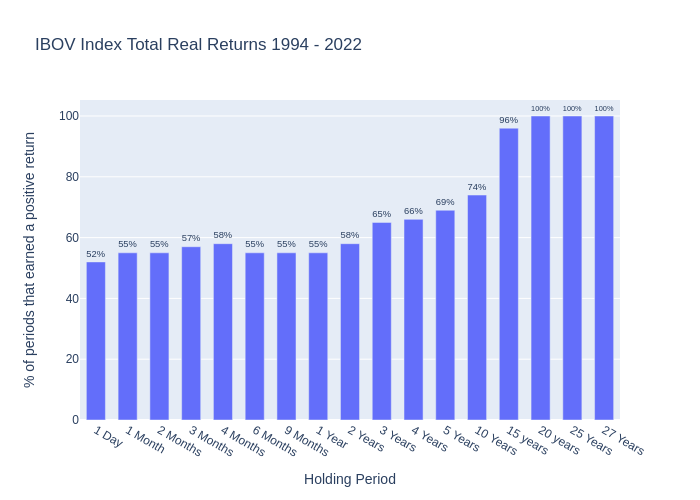

In [24]:
fig = px.bar(df_return, y= '% of periods that earned a positive return', x= 'Holding Period', text_auto='.2s',
            title="IBOV Index Total Real Returns 1994 - 2022", height=500)
fig.update_traces(textfont_size=12, textangle=0, texttemplate='%{y}%', textposition="outside", cliponaxis=False, width = 0.6)

fig.show('png')